## CUSTOMER SEGMENTATION ANALYSIS

## Name - Nabeel Ghalib

## Project Overview:   

The aim of this data analytics project is to perform customer segmentation analysis for an e-commerce company. By analyzing customer behavior and purchase patterns, the goal is to group customers into distinct segments.
Utilizing clustering algorithms (K-means) to segment customers based on behavior and purchase patterns.
This segmentation can inform targeted marketing strategies, improve customer satisfaction, and enhance overall business strategies.



## Business Task:
Analyze customer behavior and purchase patterns and segment them into groups.


## Importing required libraries and Dataset

In [1]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
df = pd.read_csv('F:/Data Analytics/OASIS_INFOBYTE/Projects dataset/project2_lvl1_cust_segmentation(KNN)/ifood_df.csv')

In [3]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [4]:
df.shape

(2205, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

## Data Cleaning

In [6]:
# Dupliicates
df.loc[df.duplicated()]
df.duplicated().sum()

184

In [7]:
df = df.drop_duplicates()

In [8]:
# after dropping the duplicate rows
df.shape

(2021, 39)

In [9]:
# dropping these columns
df = df.drop(['Z_Revenue','Z_CostContact'], axis = 1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2021 entries, 0 to 2204
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2021 non-null   float64
 1   Kidhome               2021 non-null   int64  
 2   Teenhome              2021 non-null   int64  
 3   Recency               2021 non-null   int64  
 4   MntWines              2021 non-null   int64  
 5   MntFruits             2021 non-null   int64  
 6   MntMeatProducts       2021 non-null   int64  
 7   MntFishProducts       2021 non-null   int64  
 8   MntSweetProducts      2021 non-null   int64  
 9   MntGoldProds          2021 non-null   int64  
 10  NumDealsPurchases     2021 non-null   int64  
 11  NumWebPurchases       2021 non-null   int64  
 12  NumCatalogPurchases   2021 non-null   int64  
 13  NumStorePurchases     2021 non-null   int64  
 14  NumWebVisitsMonth     2021 non-null   int64  
 15  AcceptedCmp3          2021

- There are no missing values
- Duplicated rows have been removed

## Descriptive Statistics

In [11]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,51687.258783,0.443345,0.509649,48.880752,306.492331,26.364671,166.059871,37.603662,27.268679,43.921821,...,0.251856,0.034636,0.090549,0.024245,0.502227,0.165760,0.217219,563.789213,519.867392,0.302326
std,20713.046401,0.536196,0.546393,28.950917,337.603877,39.776518,219.869126,54.892196,41.575454,51.678211,...,0.434186,0.182902,0.287038,0.153848,0.500119,0.371957,0.412455,576.775749,554.797857,0.680812
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35416.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000
50%,51412.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.000000
75%,68274.000000,1.000000,1.000000,74.000000,507.000000,33.000000,230.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.000000


## Outliers

<Axes: ylabel='MntTotal'>

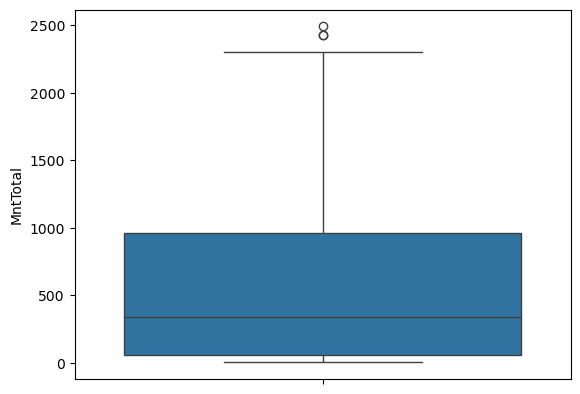

In [12]:
sns.boxplot(y = df['MntTotal'])

<Axes: xlabel='Income'>

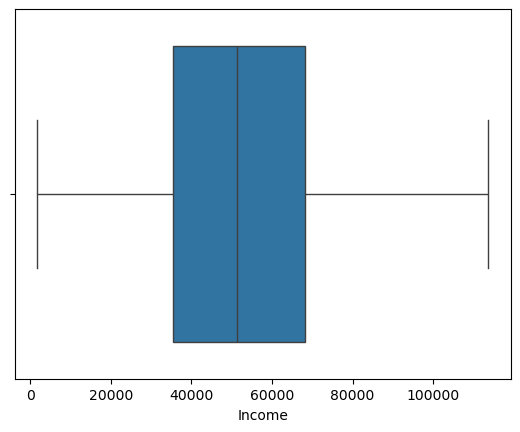

In [13]:
sns.boxplot(x = df['Income'])

In [14]:
# replace the outliers with upper limit and lower limit values 
Q1 = df['MntTotal'].quantile(0.25)
Q3 = df['MntTotal'].quantile(0.75)
IQR = Q3 -Q1
IQR

ub = Q3 + 1.5 * IQR
lb = Q1 - 1.5 * IQR

outliers = df[(df['MntTotal'] < lb) | (df['MntTotal'] > ub)]

outliers

df['MntTotal'] = np.where(df['MntTotal'] > ub, ub, np.where(df['MntTotal'] < lb, df['MntTotal'].min(), df['MntTotal']))

In [15]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,51687.258783,0.443345,0.509649,48.880752,306.492331,26.364671,166.059871,37.603662,27.268679,43.921821,...,0.251856,0.034636,0.090549,0.024245,0.502227,0.165760,0.217219,563.607867,519.867392,0.302326
std,20713.046401,0.536196,0.546393,28.950917,337.603877,39.776518,219.869126,54.892196,41.575454,51.678211,...,0.434186,0.182902,0.287038,0.153848,0.500119,0.371957,0.412455,576.200310,554.797857,0.680812
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35416.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000
50%,51412.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.000000
75%,68274.000000,1.000000,1.000000,74.000000,507.000000,33.000000,230.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2327.500000,2458.000000,4.000000


<Axes: xlabel='MntTotal'>

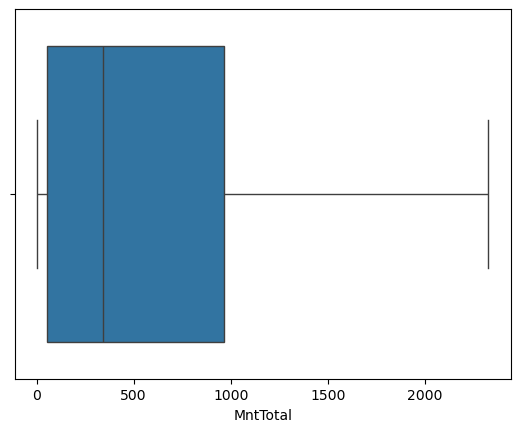

In [16]:
# After treating outliers
sns.boxplot(x = df['MntTotal'])

Text(0.5, 1.0, 'Income vs Total amount spent')

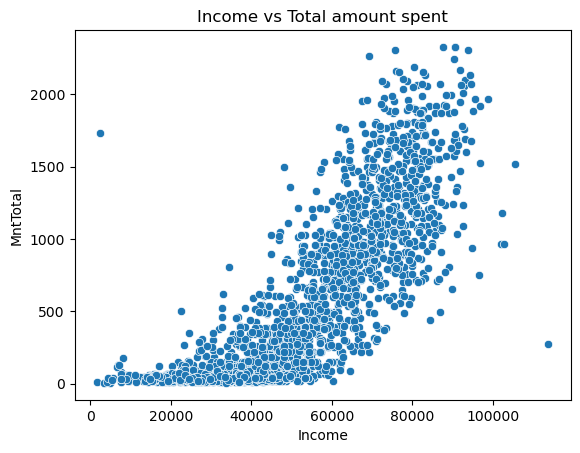

In [17]:
# income vs total amount spent
sns.scatterplot(x = df['Income'], y = df['MntTotal'])
plt.title("Income vs Total amount spent")

In [18]:
df['Age'].describe()

count    2021.000000
mean       51.117269
std        11.667616
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max        80.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Income Distribution')

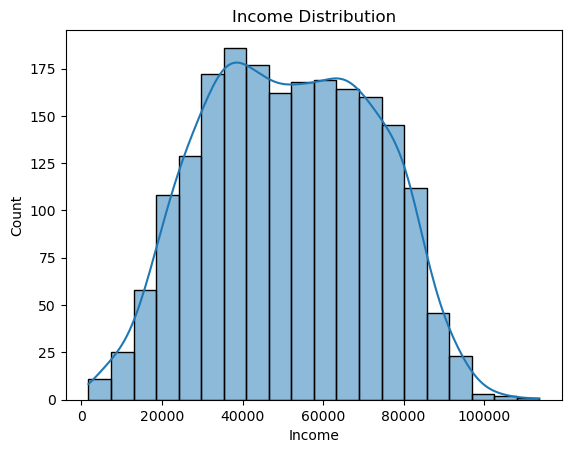

In [19]:
# Income distribution
sns.histplot(x = df['Income'], bins = 20, kde= True)
plt.title('Income Distribution')

In [20]:
print(df['Income'].skew())

0.004357040710783565


- Income has normal distribution with no high tails(Outliers) at the end

Text(0.5, 1.0, 'Age distribution')

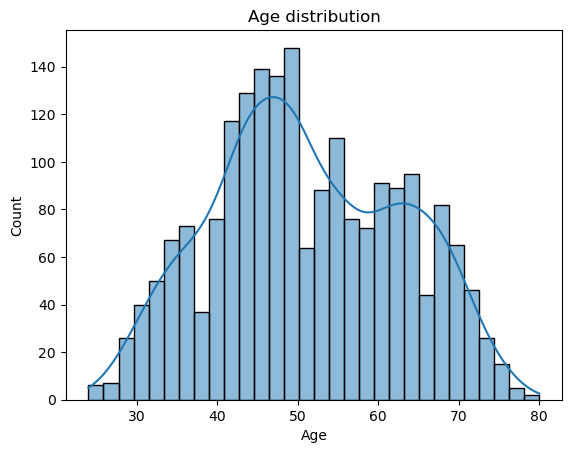

In [21]:
# age distribution
sns.histplot(x = df['Age'], bins = 30, kde= True)
plt.title('Age distribution')

In [22]:
print(df['Age'].skew())
print(df['Age'].kurt())

0.0921129011693123
-0.8016274864117552


- Age is nearer to normal distribution

<Axes: xlabel='Kidhome', ylabel='count'>

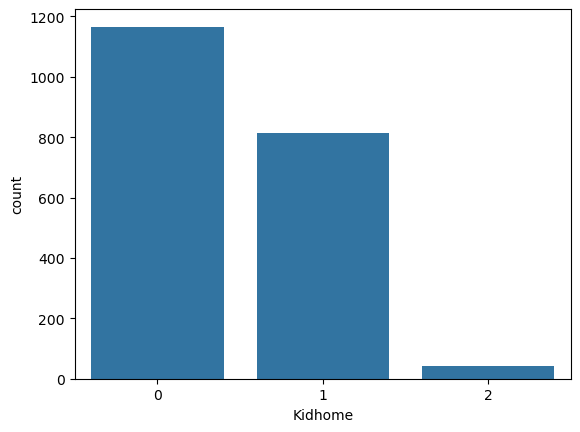

In [23]:
# number of kids at home
sns.countplot(x= df['Kidhome'])

- Most of the customers do not have kids

<Axes: xlabel='Teenhome', ylabel='count'>

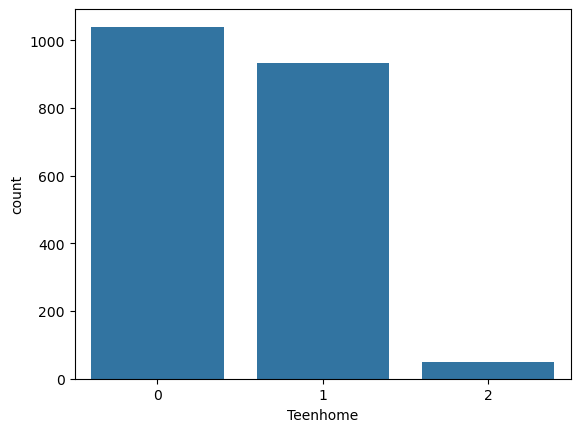

In [24]:
# number of Teens at home
sns.countplot(x= df['Teenhome'])

- Most of the customers do not have teen kids, but the second majorty is 1 teen at home

## Correlation Analysis

<Axes: >

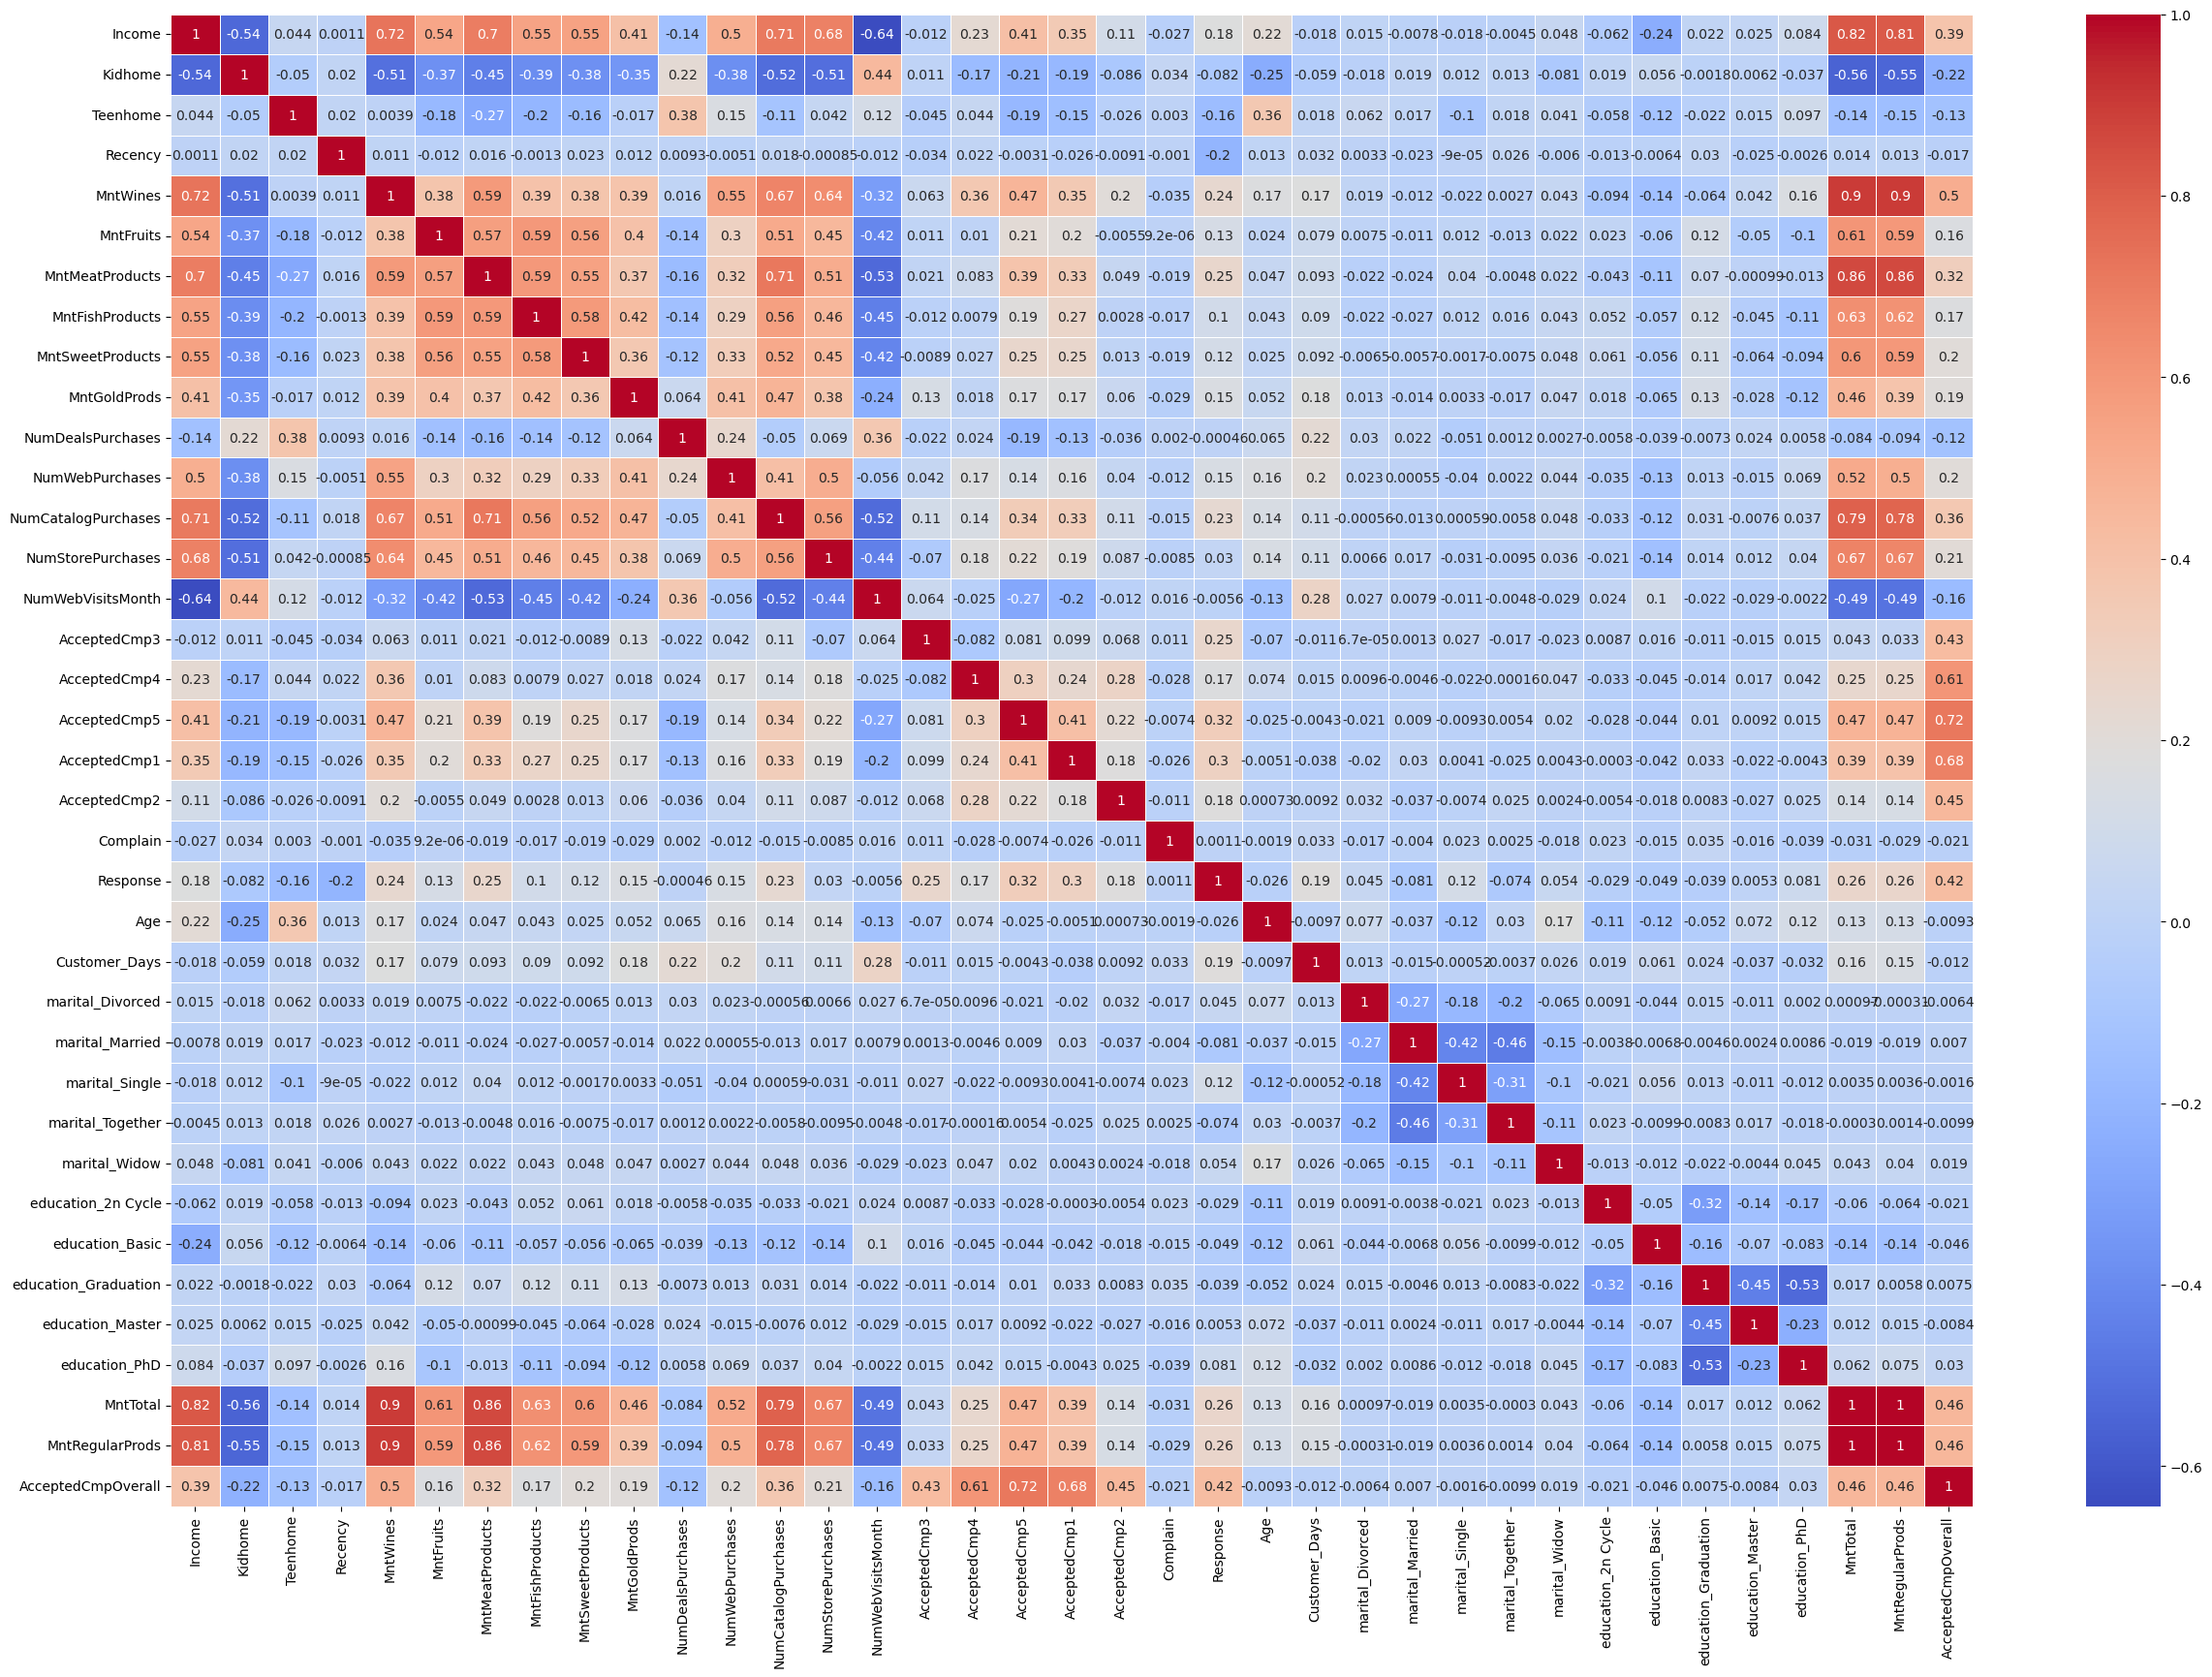

In [25]:
# Correlation
corre = df.corr()

plt.figure(figsize=(30,20))
sns.heatmap(corre, annot = True, cmap='coolwarm', linewidths=0.5)

## Creating new column Marital and storing them to use it easily in clustering

In [26]:
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'    
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
        
df['Marital'] = df.apply(get_marital_status, axis = 1)

In [27]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,1,0,0,1529.0,1441,0,Single
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,1,0,0,21.0,15,0,Single
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,734.0,692,0,Together
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,48.0,43,0,Together
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,1,407.0,392,0,Married


C:\Users\NABEEL\AppData\Local\Temp\ipykernel_536\3126768125.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Marital',y = 'MntTotal', data = df, palette = 'magma')


<Axes: xlabel='Marital', ylabel='MntTotal'>

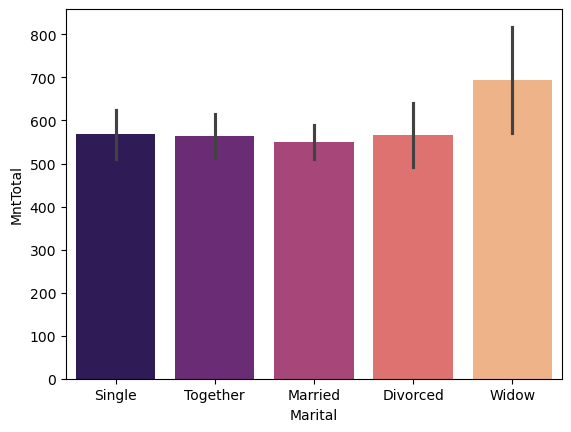

In [28]:
# mean 
sns.barplot(x= 'Marital',y = 'MntTotal', data = df, palette = 'magma')


In [29]:
# create in_relationship columns and storing the values as 0 an 1,  1- married, together, 0- divorced, widow , single
def get_relationship(row):
    if row['marital_Married'] == 1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0

df['In_relationship'] = df.apply(get_relationship, axis = 1)

In [30]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529.0,1441,0,Single,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21.0,15,0,Single,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734.0,692,0,Together,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48.0,43,0,Together,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407.0,392,0,Married,1


## Building K - means Clustering model
### Using 3 variables - In_relationship+Income+MntTotal

In [31]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
cluster_variables = ['Income', 'MntTotal', 'In_relationship']

In [34]:
df_scaled = df.copy()

In [35]:
df_scaled.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529.0,1441,0,Single,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21.0,15,0,Single,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734.0,692,0,Together,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48.0,43,0,Together,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407.0,392,0,Married,1


In [36]:
df_scaled[cluster_variables] = scaler.fit_transform(df[cluster_variables])

In [37]:
df_scaled.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,In_relationship
0,0.311511,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1.675860,1441,0,Single,-1.334135
1,-0.258030,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,-0.941933,15,0,Single,-1.334135
2,0.962228,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,0.295790,692,0,Together,0.749549
3,-1.209260,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,-0.895063,43,0,Together,0.749549
4,0.318996,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,-0.271861,392,0,Married,0.749549


In [38]:
df_scaled[cluster_variables].head()

,Income,MntTotal,In_relationship
0,0.311511,1.675860,-1.334135
1,-0.258030,-0.941933,-1.334135
2,0.962228,0.295790,0.749549
3,-1.209260,-0.895063,0.749549
4,0.318996,-0.271861,0.749549


## Elbow Method

In [39]:
# To determine the total clusters
from sklearn.cluster import KMeans
X = df_scaled[cluster_variables]

wcss = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=7)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

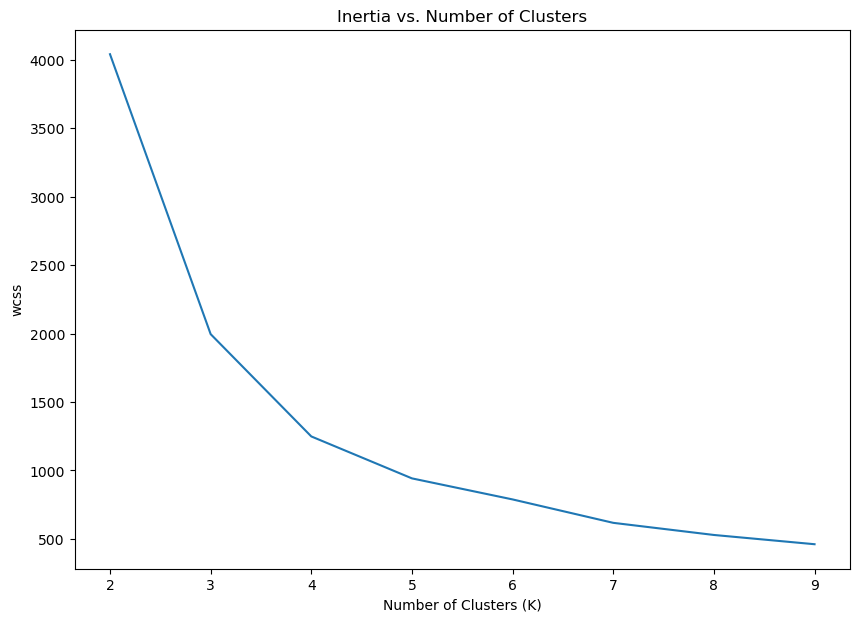

In [40]:
plt.figure(figsize=(10,7))
plt.plot(range(2,10), wcss)
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("wcss")
plt.show()

- 4 or 5 clusters can be made, so use silhoutte score to choose the number of clusters.

## Silhouette score

In [41]:
# To pick the clusters with highest silhouette score
from sklearn.metrics import silhouette_score

In [42]:
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

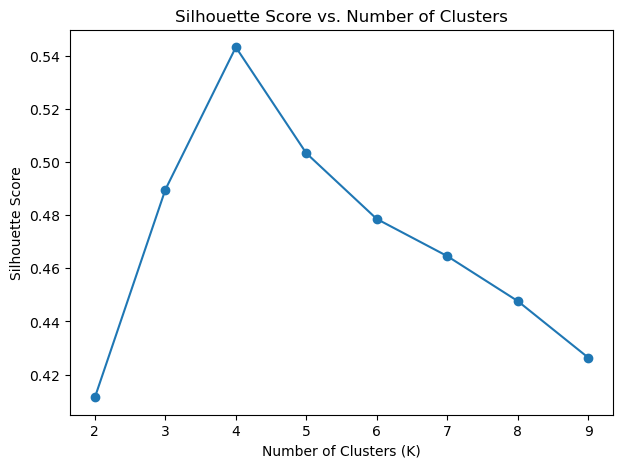

In [43]:
plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list, marker = 'o')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

- silhoutte score for 4 is high, so going to choose 4 clusters.

In [44]:
# fitting the k- means clustering model

clstr_m = KMeans(n_clusters=4, random_state = 7)
clstr_m.fit(X)
df_scaled['Cluster'] = clstr_m.predict(X)

In [45]:
df_scaled.head(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,In_relationship,Cluster
0,0.311511,0,0,58,635,88,546,172,88,88,...,0,1,0,0,1.675860,1441,0,Single,-1.334135,3
1,-0.258030,1,1,38,11,1,6,2,1,6,...,0,1,0,0,-0.941933,15,0,Single,-1.334135,0
2,0.962228,0,0,26,426,49,127,111,21,42,...,0,1,0,0,0.295790,692,0,Together,0.749549,1
3,-1.209260,1,0,26,11,4,20,10,3,5,...,0,1,0,0,-0.895063,43,0,Together,0.749549,2
4,0.318996,1,0,94,173,43,118,46,27,15,...,0,0,0,1,-0.271861,392,0,Married,0.749549,2
5,0.522783,0,1,16,520,42,98,0,42,14,...,0,0,1,0,0.240240,688,0,Together,0.749549,1
6,0.190639,0,1,34,235,65,164,50,49,27,...,0,1,0,0,-0.001055,536,0,Divorced,-1.334135,0
7,-0.880497,1,0,32,76,10,56,3,1,23,...,0,0,0,1,-0.724941,123,0,Married,0.749549,2
8,-1.030343,1,0,19,14,0,24,3,3,2,...,0,0,0,1,-0.902007,42,0,Together,0.749549,2
9,-2.223268,1,1,68,28,0,6,1,1,13,...,0,0,0,1,-0.915894,23,1,Together,0.749549,2


## Visualizing the clusters

In [46]:
# Principal Component Analysis (PCA)
# PCA for dimensionality reduction to 2D for visualization
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(df_scaled[cluster_variables])
df_scaled['pc1'] = pca_res[:,0]
df_scaled['pc2'] = pca_res[:,1]

In [47]:
df_scaled.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,In_relationship,Cluster,pc1,pc2
0,0.311511,0,0,58,635,88,546,172,88,88,...,0,0,1.675860,1441,0,Single,-1.334135,3,1.441610,1.301447
1,-0.258030,1,1,38,11,1,6,2,1,6,...,0,0,-0.941933,15,0,Single,-1.334135,0,-0.811455,1.353685
2,0.962228,0,0,26,426,49,127,111,21,42,...,0,0,0.295790,692,0,Together,0.749549,1,0.868513,-0.776978
3,-1.209260,1,0,26,11,4,20,10,3,5,...,0,0,-0.895063,43,0,Together,0.749549,2,-1.508053,-0.706722
4,0.318996,1,0,94,173,43,118,46,27,15,...,0,1,-0.271861,392,0,Married,0.749549,2,0.012619,-0.753015


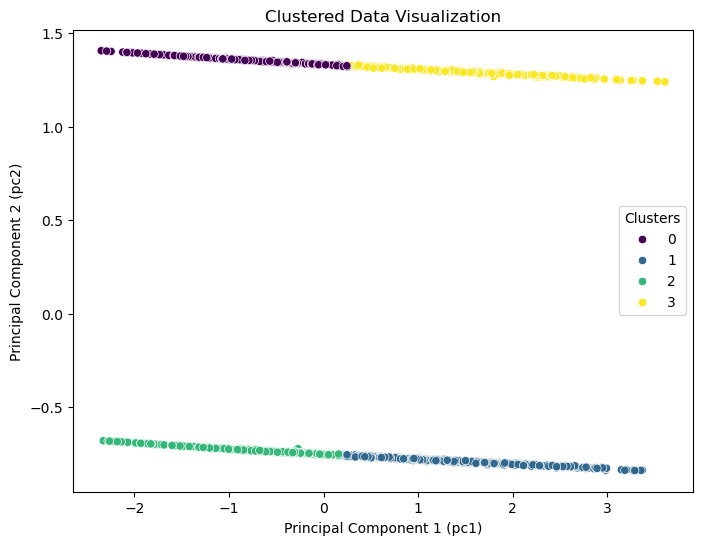

In [48]:
# 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pc1', y='pc2', data = df_scaled, hue='Cluster', palette='viridis')
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Clusters')

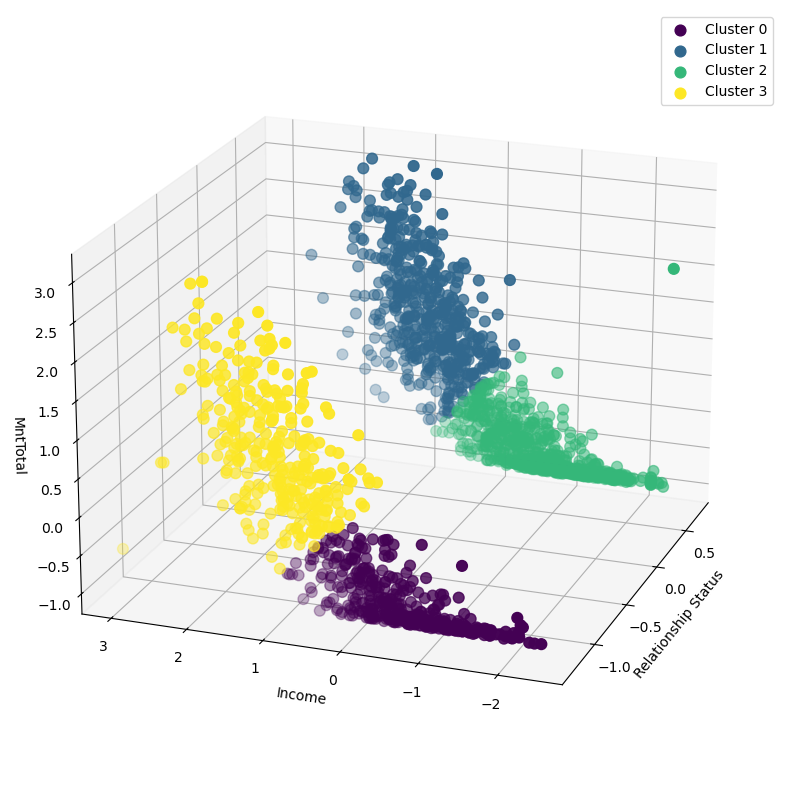

In [49]:
# 3d plot for relationship status , income and amount spent
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Create a figure and a 3D axis
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Define the number of clusters
n_clusters = 4

# Generate a list of colors from the viridis colormap
colors = cm.viridis(np.linspace(0, 1, n_clusters))

# Plot each cluster with its corresponding color
for i in range(n_clusters):
    ax.scatter(df_scaled.In_relationship[df_scaled.Cluster == i],
               df_scaled.Income[df_scaled.Cluster == i],
               df_scaled.MntTotal[df_scaled.Cluster == i],
               s=60, color=colors[i], label=f'Cluster {i}')

# Adjust the view angle
ax.view_init(20, 200)

# Add labels
ax.set_xlabel('Relationship Status')
ax.set_ylabel('Income')
ax.set_zlabel('MntTotal')

# Add a legend to distinguish clusters
ax.legend()

# Show the plot
plt.show()


<Axes: xlabel='Income', ylabel='MntTotal'>

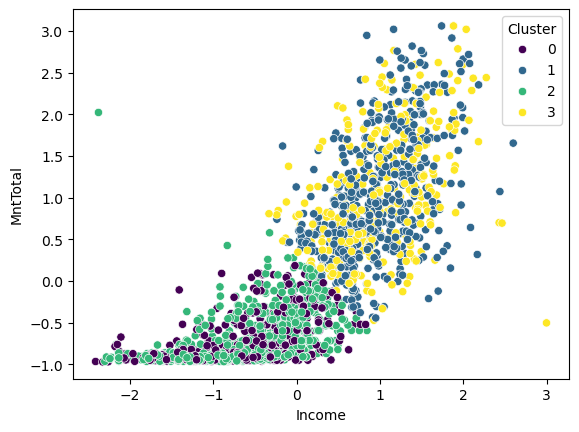

In [50]:
# scatterplot for income and mnttotal

sns.scatterplot(x= df_scaled['Income'], y = df_scaled['MntTotal'], hue = 'Cluster', data = df_scaled, palette = 'viridis')

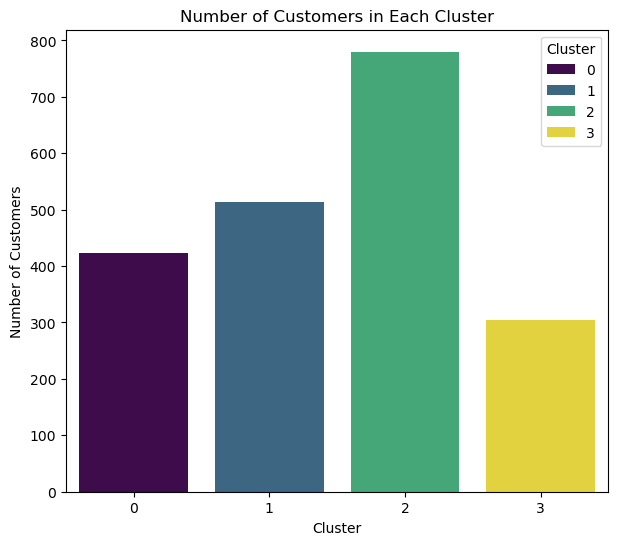

In [51]:
# Plot the bar chart

plt.figure(figsize=(7, 6))
sns.countplot(x = df_scaled['Cluster'], hue = df_scaled['Cluster'], palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Each Cluster')
plt.show()

In [52]:
df_scaled['Cluster'].value_counts()

Cluster
2    780
1    514
0    423
3    304
Name: count, dtype: int64

### Customers in each cluster
- cluster 2 has the most number of customers about 780 followed by cluster 1 which has 514 customers
- cluster 3 has the least number of customers about 304
- cluster 0 has 423 customers

## Income and MntTotal by Cluster

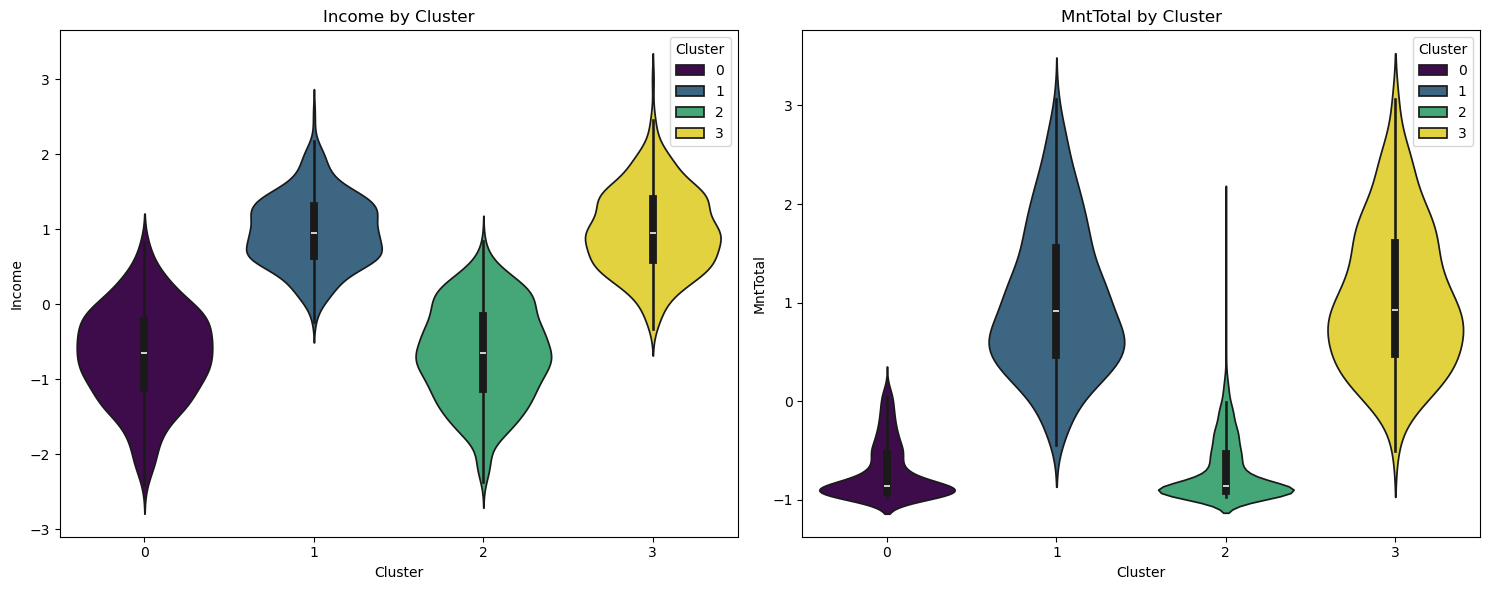

In [53]:
# cluster and income , cluster and mnttotal
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# First subplot for Income
sns.violinplot(x=df_scaled['Cluster'], y=df_scaled['Income'], hue=df_scaled['Cluster'], palette='viridis', ax=axes[0])
axes[0].set_title('Income by Cluster')

# Second subplot for MntTotal
sns.violinplot(x=df_scaled['Cluster'], y=df_scaled['MntTotal'], hue=df_scaled['Cluster'], palette='viridis', ax=axes[1])
axes[1].set_title('MntTotal by Cluster')

# plt.savefig('F:/Data Analytics/OASIS_INFOBYTE/income_distribution_by_cluster.png') 

# Adjust layout
plt.tight_layout()
plt.show()



## Observations: Income and MntTotal by Cluster
- Customers in cluster 1 and 3 have higher income and high total amount spent compared to customers in cluster 0 and 2

## Cluster, Income and MntTotal by Relationship

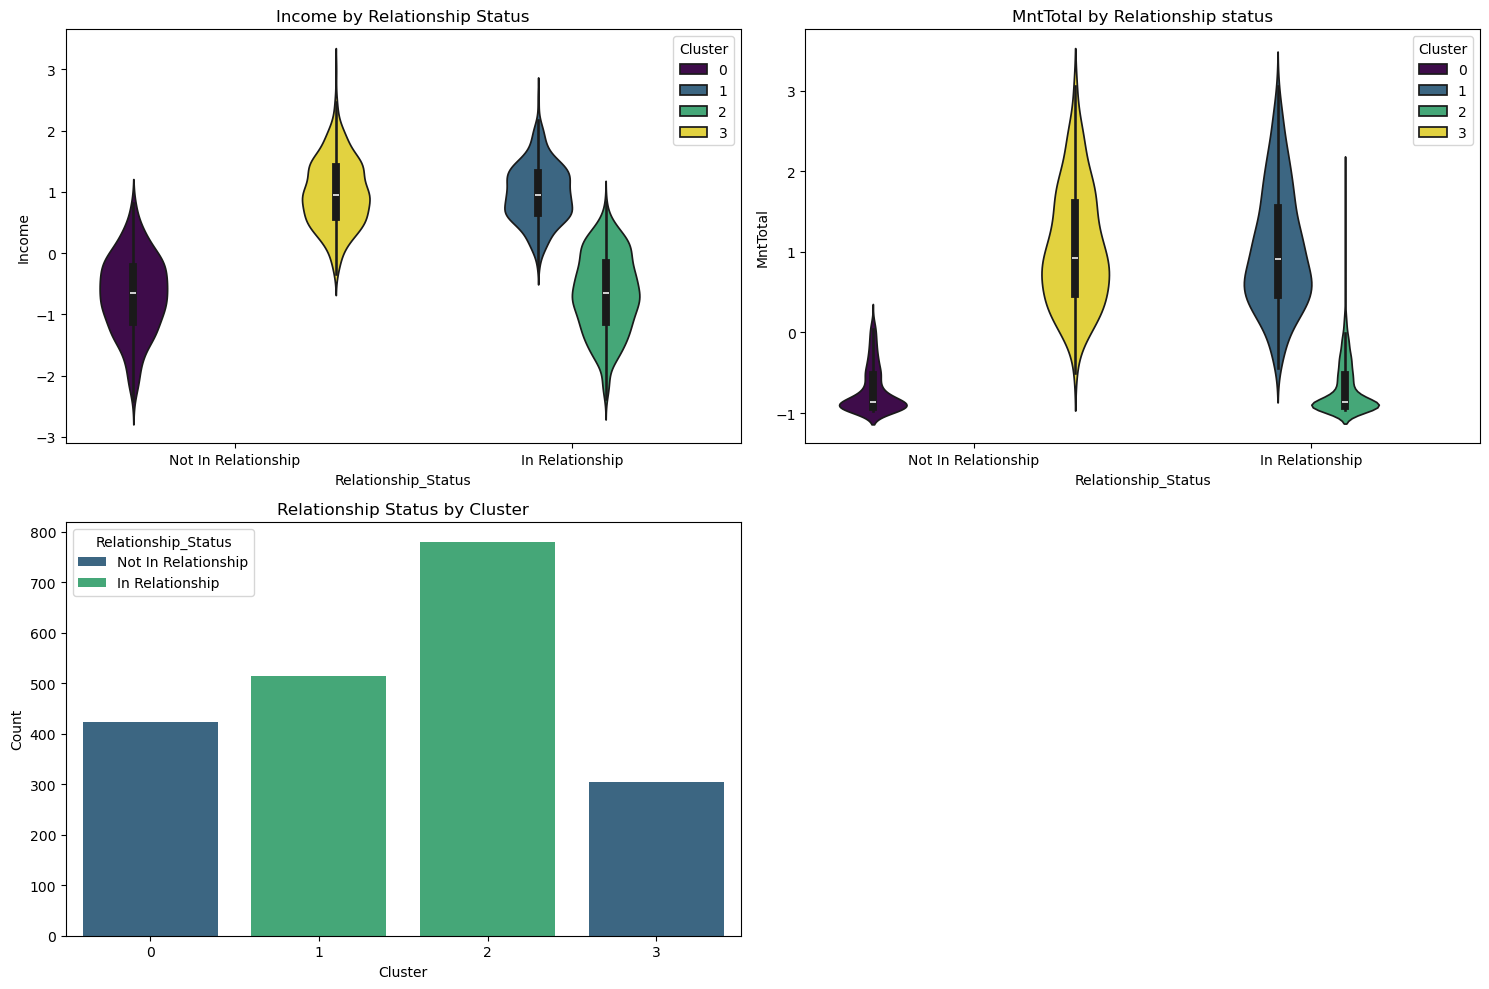

In [54]:
# Categorize the 'In_relationship' status
df_scaled['Relationship_Status'] = df_scaled['In_relationship'].apply(lambda x: 'In Relationship' if x > 0 else 'Not In Relationship')

# Group the data by Cluster and Relationship_Status and count the occurrences
df_relationship_status = df_scaled.groupby(['Cluster', 'Relationship_Status']).size().reset_index(name='Count')


fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# First subplot for Income
sns.violinplot(x='Relationship_Status', y='Income', hue='Cluster', data=df_scaled, palette='viridis', ax= axes[0,0])
axes[0,0].set_title('Income by Relationship Status')

# Second subplot for MntTotal
sns.violinplot(x='Relationship_Status', y= 'MntTotal', hue='Cluster', data=df_scaled, palette='viridis', ax= axes[0,1])
axes[0,1].set_title('MntTotal by Relationship status')

# third subplot for relationship status
sns.barplot(x='Cluster', y='Count', hue='Relationship_Status', data=df_relationship_status, palette='viridis', ax= axes[1,0])
axes[1,0].set_title('Relationship Status by Cluster')

# removing excess plot
fig.delaxes(axes[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()


## Observations:
### High income and amount spent by relationship status and cluster wise 

- Customers from cluster 3 who are not in relationship and customers from cluster 1 who are in relationship have higher income and total amount spent compared to cluster 0 and 2.
 
### Relationship status by cluster
- Cluster 1 and 2 has customers who are in relationship
- Cluster 0 and 3 has customers who are not in relationship
- Cluster 2 has most number of customers followed by Cluster 1 and the customers in both the clusters are in a relationship

### Summary



1. **Cluster Size Distribution:**
   - **Cluster 2** has the highest number of customers (780), while **Cluster 3** has the least (304). This distribution suggests that **Cluster 2** is the most common segment, and **Cluster 3** is more niche.

2. **Income and Total Amount Spent:**
   - **Clusters 1 and 3** show higher income and total amount spent compared to **Clusters 0 and 2**. This indicates that customers in **Clusters 1 and 3** are more financially active.

3. **Income and Amount Spent by Relationship Status:**
   - **Cluster 3** (not in a relationship) and **Cluster 1** (in a relationship) have higher income and total amount spent. This implies that relationship status has an impact on spending patterns and income levels.

4. **Relationship Status by Cluster:**
   - **Clusters 1 and 2** contain customers who are in relationships, while **Clusters 0 and 3** contain customers who are not. **Cluster 2** has the highest number of customers who are in a potentially increase overall revenue.

### Recommendations:

1. **Targeted Marketing Strategies:**
   - **Cluster 2** (high number of customers in relationships) can be targeted with promotions or products that appeal to couples or families. As this cluster is large, it presents a significant opportunity for relationship-based marketing.

2. **High-Income Segments:**
   - For **Clusters 1 and 3**, which have higher income and spending, consider premium products or exclusive offers. Tailor your marketing messages to highlight luxury and exclusivity.

3. **Relationship Status Insights:**
   - **Cluster 3** customers who are not in a relationship might appreciate products or services catering to single individuals. Highlight independence and personal enjoyment in marketing campaigns.
   - **Cluster 1** customers who are in relationships may be more receptive to family-oriented or couple-focused products. Offer discounts or bundles for couples or family plans.

4. **Customer Retention and Engagement:**
   - Since **Cluster 2** has a high number of customers in relationships, focus on retaining these customers through loyalty programs or relationship-based incentives.

5. **Resource Allocation:**
   - Allocate more resources to marketing and customer service for **Clusters 1 and 2** due to their higher income and spending. Ensure that high-value customers in these clusters receive personalized and high-quality service.

6. **Further Analysis:**
   - Consider exploring additional factors that might affect customer segmentation, such as age, education, or family status. Integrating more variables could provide deeper insights and refine segmentation strategy.

## Age Group + Income + Total Amount spent Clusters
**Purpose:** To provide a comprehensive view by combining age, economic capability, and spending behavior. Useful for creating detailed customer profiles.


In [55]:
df_scaled['Age'].describe()

count    2021.000000
mean       51.117269
std        11.667616
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max        80.000000
Name: Age, dtype: float64

In [56]:
# Define age bins and labels
bins = [18, 28, 38, 48, 58, 68, 80]
labels = ['18-27', '28-37', '38-47', '48-57', '58-67', '68+']

# Create a new column with age groups
df_scaled['AgeGroup'] = pd.cut(df_scaled['Age'], bins=bins, labels=labels, right=True)

In [57]:
df_scaled.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,In_relationship,Cluster,pc1,pc2,Relationship_Status,AgeGroup
0,0.311511,0,0,58,635,88,546,172,88,88,...,1.675860,1441,0,Single,-1.334135,3,1.441610,1.301447,Not In Relationship,58-67
1,-0.258030,1,1,38,11,1,6,2,1,6,...,-0.941933,15,0,Single,-1.334135,0,-0.811455,1.353685,Not In Relationship,58-67
2,0.962228,0,0,26,426,49,127,111,21,42,...,0.295790,692,0,Together,0.749549,1,0.868513,-0.776978,In Relationship,48-57
3,-1.209260,1,0,26,11,4,20,10,3,5,...,-0.895063,43,0,Together,0.749549,2,-1.508053,-0.706722,In Relationship,28-37
4,0.318996,1,0,94,173,43,118,46,27,15,...,-0.271861,392,0,Married,0.749549,2,0.012619,-0.753015,In Relationship,38-47


In [58]:
# One hot encode 
df_scaled = pd.get_dummies(df_scaled, columns=['AgeGroup'])


In [59]:
df_scaled.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Cluster,pc1,pc2,Relationship_Status,AgeGroup_18-27,AgeGroup_28-37,AgeGroup_38-47,AgeGroup_48-57,AgeGroup_58-67,AgeGroup_68+
0,0.311511,0,0,58,635,88,546,172,88,88,...,3,1.441610,1.301447,Not In Relationship,False,False,False,False,True,False
1,-0.258030,1,1,38,11,1,6,2,1,6,...,0,-0.811455,1.353685,Not In Relationship,False,False,False,False,True,False
2,0.962228,0,0,26,426,49,127,111,21,42,...,1,0.868513,-0.776978,In Relationship,False,False,False,True,False,False
3,-1.209260,1,0,26,11,4,20,10,3,5,...,2,-1.508053,-0.706722,In Relationship,False,True,False,False,False,False
4,0.318996,1,0,94,173,43,118,46,27,15,...,2,0.012619,-0.753015,In Relationship,False,False,True,False,False,False


In [60]:
# converting bool values int int
bool_cols = df_scaled.select_dtypes(include='bool').columns
bool_cols
df_scaled[bool_cols] = df_scaled[bool_cols].astype(int)

In [61]:
df_scaled.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Cluster,pc1,pc2,Relationship_Status,AgeGroup_18-27,AgeGroup_28-37,AgeGroup_38-47,AgeGroup_48-57,AgeGroup_58-67,AgeGroup_68+
0,0.311511,0,0,58,635,88,546,172,88,88,...,3,1.441610,1.301447,Not In Relationship,0,0,0,0,1,0
1,-0.258030,1,1,38,11,1,6,2,1,6,...,0,-0.811455,1.353685,Not In Relationship,0,0,0,0,1,0
2,0.962228,0,0,26,426,49,127,111,21,42,...,1,0.868513,-0.776978,In Relationship,0,0,0,1,0,0
3,-1.209260,1,0,26,11,4,20,10,3,5,...,2,-1.508053,-0.706722,In Relationship,0,1,0,0,0,0
4,0.318996,1,0,94,173,43,118,46,27,15,...,2,0.012619,-0.753015,In Relationship,0,0,1,0,0,0


In [62]:
# standardize
# Columns to standardize
columns_to_standardize = ['AgeGroup_18-27','AgeGroup_28-37', 'AgeGroup_38-47', 'AgeGroup_48-57', 'AgeGroup_58-67', 'AgeGroup_68+']

# Standardize only the AgeGroup columns
scaler = StandardScaler()
df_scaled[columns_to_standardize] = scaler.fit_transform(df_scaled[columns_to_standardize])

df_scaled.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Cluster,pc1,pc2,Relationship_Status,AgeGroup_18-27,AgeGroup_28-37,AgeGroup_38-47,AgeGroup_48-57,AgeGroup_58-67,AgeGroup_68+
0,0.311511,0,0,58,635,88,546,172,88,88,...,3,1.441610,1.301447,Not In Relationship,-0.111915,-0.401863,-0.647489,-0.593161,1.915055,-0.292219
1,-0.258030,1,1,38,11,1,6,2,1,6,...,0,-0.811455,1.353685,Not In Relationship,-0.111915,-0.401863,-0.647489,-0.593161,1.915055,-0.292219
2,0.962228,0,0,26,426,49,127,111,21,42,...,1,0.868513,-0.776978,In Relationship,-0.111915,-0.401863,-0.647489,1.685884,-0.522178,-0.292219
3,-1.209260,1,0,26,11,4,20,10,3,5,...,2,-1.508053,-0.706722,In Relationship,-0.111915,2.488407,-0.647489,-0.593161,-0.522178,-0.292219
4,0.318996,1,0,94,173,43,118,46,27,15,...,2,0.012619,-0.753015,In Relationship,-0.111915,-0.401863,1.544429,-0.593161,-0.522178,-0.292219


In [63]:
# choosing variables to cluster
age_cluster = ['AgeGroup_18-27','AgeGroup_28-37', 'AgeGroup_38-47', 'AgeGroup_48-57', 'AgeGroup_58-67', 'AgeGroup_68+', 'Income', 'MntTotal']
df_age_cluster = df_scaled[age_cluster]

df_age_cluster.head()

,AgeGroup_18-27,AgeGroup_28-37,AgeGroup_38-47,AgeGroup_48-57,AgeGroup_58-67,AgeGroup_68+,Income,MntTotal
0,-0.111915,-0.401863,-0.647489,-0.593161,1.915055,-0.292219,0.311511,1.675860
1,-0.111915,-0.401863,-0.647489,-0.593161,1.915055,-0.292219,-0.258030,-0.941933
2,-0.111915,-0.401863,-0.647489,1.685884,-0.522178,-0.292219,0.962228,0.295790
3,-0.111915,2.488407,-0.647489,-0.593161,-0.522178,-0.292219,-1.209260,-0.895063
4,-0.111915,-0.401863,1.544429,-0.593161,-0.522178,-0.292219,0.318996,-0.271861


### Elbow method

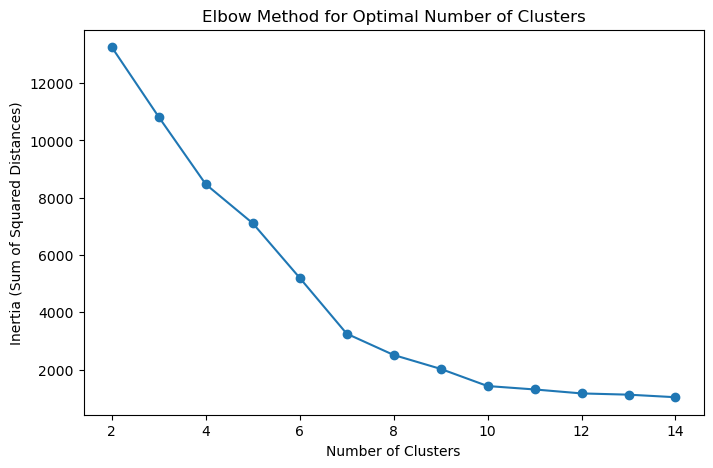

In [64]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define a range of possible cluster numbers
range_n_clusters = list(range(2, 15))

# List to store the sum of squared distances (inertia) for each number of clusters
inertia = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters,init='k-means++', random_state=7)
    kmeans.fit(df_age_cluster)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


### Silhouette Score

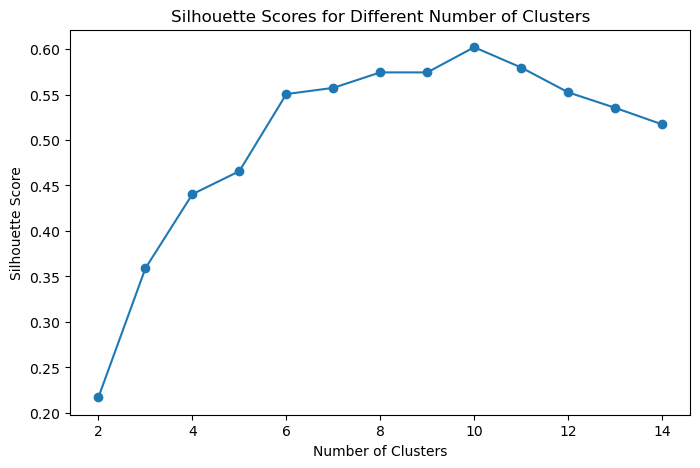

Optimal number of clusters: 10
Highest Silhouette Score: 0.6020022437506474


In [65]:
from sklearn.metrics import silhouette_score

# List to store silhouette scores for each number of clusters
silhouette_scores = []

cluster_range = range(2, 15)

for n_clusters in cluster_range:  # Silhouette score isn't defined for 1 cluster
    kmeans = KMeans(n_clusters=n_clusters, random_state=7)
    cluster_labels = kmeans.fit_predict(df_age_cluster)
    silhouette_avg = silhouette_score(df_age_cluster, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.show()

# Find the optimal number of clusters with the highest silhouette score
optimal_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
highest_silhouette_score = max(silhouette_scores)

print(f"Optimal number of clusters: {optimal_n_clusters}")
print(f"Highest Silhouette Score: {highest_silhouette_score}")


In [66]:
results = pd.DataFrame({'Number of Clusters': cluster_range, 'Inertia': inertia, 'Silhouette Score': silhouette_scores})
print(results)

    Number of Clusters       Inertia  Silhouette Score
0                    2  13252.461851          0.217201
1                    3  10815.506022          0.358967
2                    4   8469.463896          0.440408
3                    5   7109.002321          0.465748
4                    6   5202.992760          0.550502
5                    7   3255.532959          0.557318
6                    8   2512.293597          0.574342
7                    9   2027.092664          0.574309
8                   10   1428.077688          0.602002
9                   11   1309.156035          0.579669
10                  12   1170.751147          0.552419
11                  13   1127.276534          0.535379
12                  14   1037.885017          0.517176


- we can use 10 , 9 and 6 clusters, i am choosing 9

In [67]:
df_age_cluster

,AgeGroup_18-27,AgeGroup_28-37,AgeGroup_38-47,AgeGroup_48-57,AgeGroup_58-67,AgeGroup_68+,Income,MntTotal
0,-0.111915,-0.401863,-0.647489,-0.593161,1.915055,-0.292219,0.311511,1.675860
1,-0.111915,-0.401863,-0.647489,-0.593161,1.915055,-0.292219,-0.258030,-0.941933
2,-0.111915,-0.401863,-0.647489,1.685884,-0.522178,-0.292219,0.962228,0.295790
3,-0.111915,2.488407,-0.647489,-0.593161,-0.522178,-0.292219,-1.209260,-0.895063
4,-0.111915,-0.401863,1.544429,-0.593161,-0.522178,-0.292219,0.318996,-0.271861
...,...,...,...,...,...,...,...,...
2198,-0.111915,2.488407,-0.647489,-0.593161,-0.522178,-0.292219,-1.201050,-0.945405
2200,-0.111915,-0.401863,-0.647489,1.685884,-0.522178,-0.292219,0.460488,0.920727
2202,-0.111915,-0.401863,1.544429,-0.593161,-0.522178,-0.292219,0.255638,1.134248
2203,-0.111915,-0.401863,-0.647489,-0.593161,1.915055,-0.292219,0.847876,0.379115


In [68]:
#  k means model

clstr_age = KMeans(n_clusters = 9, random_state = 7)
clstr_age.fit(df_age_cluster)
df_scaled['Cluster_age'] = clstr_age.predict(df_age_cluster)


In [69]:
df_scaled.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,pc1,pc2,Relationship_Status,AgeGroup_18-27,AgeGroup_28-37,AgeGroup_38-47,AgeGroup_48-57,AgeGroup_58-67,AgeGroup_68+,Cluster_age
0,0.311511,0,0,58,635,88,546,172,88,88,...,1.441610,1.301447,Not In Relationship,-0.111915,-0.401863,-0.647489,-0.593161,1.915055,-0.292219,8
1,-0.258030,1,1,38,11,1,6,2,1,6,...,-0.811455,1.353685,Not In Relationship,-0.111915,-0.401863,-0.647489,-0.593161,1.915055,-0.292219,0
2,0.962228,0,0,26,426,49,127,111,21,42,...,0.868513,-0.776978,In Relationship,-0.111915,-0.401863,-0.647489,1.685884,-0.522178,-0.292219,7
3,-1.209260,1,0,26,11,4,20,10,3,5,...,-1.508053,-0.706722,In Relationship,-0.111915,2.488407,-0.647489,-0.593161,-0.522178,-0.292219,3
4,0.318996,1,0,94,173,43,118,46,27,15,...,0.012619,-0.753015,In Relationship,-0.111915,-0.401863,1.544429,-0.593161,-0.522178,-0.292219,1


## Visualizing the Clusters

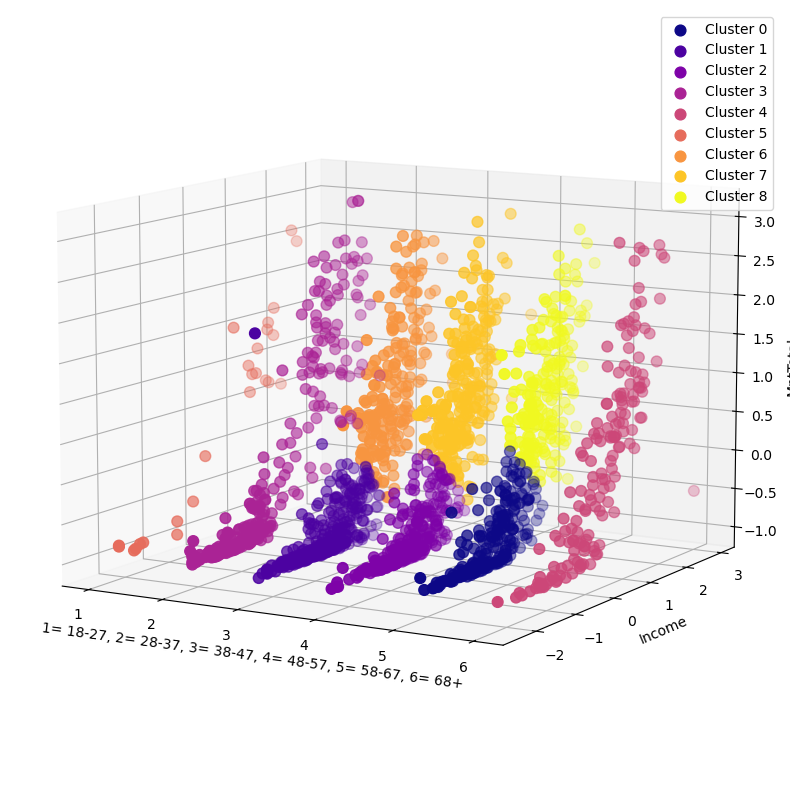

In [70]:
# Create a figure and a 3D axis
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Define the number of clusters
n_clusters = 9  

# Generate a list of colors from a colormap
colors = cm.plasma(np.linspace(0, 1, n_clusters))

# Plot each cluster with its corresponding color
for i in range(n_clusters):
    # Find the predominant age group for each customer, including 'AgeGroup_18-27'
    max_age_group = df_scaled[['AgeGroup_18-27', 'AgeGroup_28-37', 'AgeGroup_38-47', 'AgeGroup_48-57', 'AgeGroup_58-67', 'AgeGroup_68+']].idxmax(axis=1)[df_scaled['Cluster_age'] == i]
    
    # Map the age group names to numbers for visualization
    age_group_numeric = max_age_group.map({
        'AgeGroup_18-27': 1,
        'AgeGroup_28-37': 2,
        'AgeGroup_38-47': 3,
        'AgeGroup_48-57': 4,
        'AgeGroup_58-67': 5,
        'AgeGroup_68+': 6
    })
    
    ax.scatter(
        age_group_numeric,
        df_scaled['Income'][df_scaled['Cluster_age'] == i],
        df_scaled['MntTotal'][df_scaled['Cluster_age'] == i],
        s=60, color=colors[i], label=f'Cluster {i}'
    )

# Adjust the view angle
ax.view_init(10, 300)

# Add labels
ax.set_xlabel('1= 18-27, 2= 28-37, 3= 38-47, 4= 48-57, 5= 58-67, 6= 68+')
ax.set_ylabel('Income')
ax.set_zlabel('MntTotal')

# Add a legend to distinguish clusters
ax.legend()

# Show the plot
plt.show()


In [71]:
# Creating age groups column
age_group_cols = ['AgeGroup_18-27', 'AgeGroup_28-37', 'AgeGroup_38-47', 'AgeGroup_48-57', 'AgeGroup_58-67', 'AgeGroup_68+']

# Function to label age groups based on the highest standardized value
def label_age_group(row):
    max_value = row[age_group_cols].idxmax()  # Get the column name with the max value
    if max_value == 'AgeGroup_18-27':
        return '18-27'
    elif max_value == 'AgeGroup_28-37':
        return '28-37'
    elif max_value == 'AgeGroup_38-47':
        return '38-47'
    elif max_value == 'AgeGroup_48-57':
        return '48-57'
    elif max_value == 'AgeGroup_58-67':
        return '58-67'
    elif max_value == 'AgeGroup_68+':
        return '68+'
    else:
        return 'Unknown'

# Apply the function to create a new column
df_scaled['Age_Group'] = df_scaled.apply(label_age_group, axis=1)

In [72]:
df_scaled.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,pc2,Relationship_Status,AgeGroup_18-27,AgeGroup_28-37,AgeGroup_38-47,AgeGroup_48-57,AgeGroup_58-67,AgeGroup_68+,Cluster_age,Age_Group
0,0.311511,0,0,58,635,88,546,172,88,88,...,1.301447,Not In Relationship,-0.111915,-0.401863,-0.647489,-0.593161,1.915055,-0.292219,8,58-67
1,-0.258030,1,1,38,11,1,6,2,1,6,...,1.353685,Not In Relationship,-0.111915,-0.401863,-0.647489,-0.593161,1.915055,-0.292219,0,58-67
2,0.962228,0,0,26,426,49,127,111,21,42,...,-0.776978,In Relationship,-0.111915,-0.401863,-0.647489,1.685884,-0.522178,-0.292219,7,48-57
3,-1.209260,1,0,26,11,4,20,10,3,5,...,-0.706722,In Relationship,-0.111915,2.488407,-0.647489,-0.593161,-0.522178,-0.292219,3,28-37
4,0.318996,1,0,94,173,43,118,46,27,15,...,-0.753015,In Relationship,-0.111915,-0.401863,1.544429,-0.593161,-0.522178,-0.292219,1,38-47


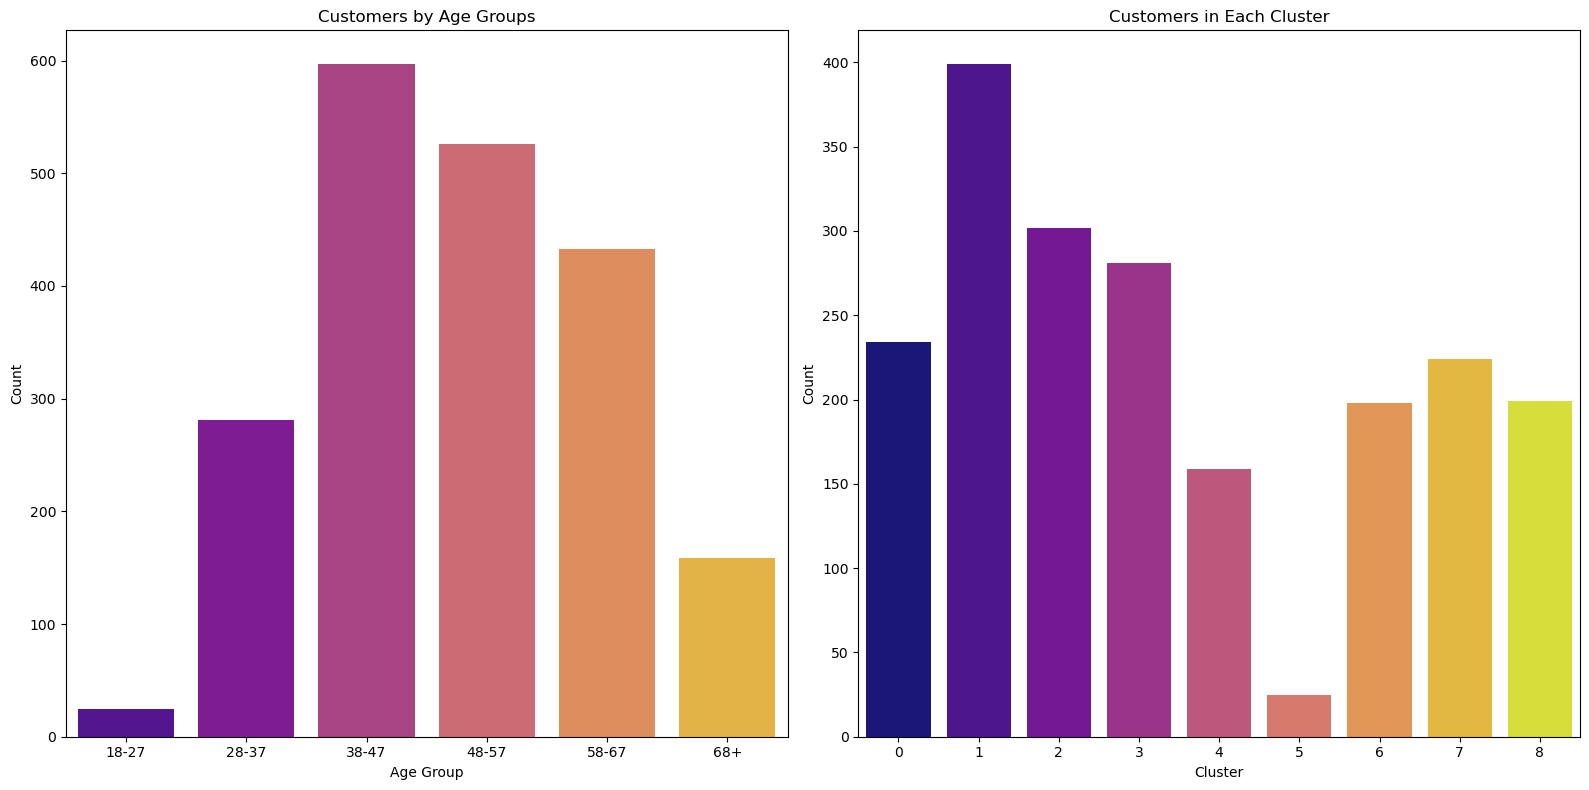

In [73]:
# Customers by Age Group

# age wise and cluster wise count
age_count = df_scaled['Age_Group'].value_counts().sort_index().reset_index()
cluster_age_count = df_scaled['Cluster_age'].value_counts().sort_index().reset_index()


fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.barplot(x = 'Age_Group', y= 'count', data = age_count, hue = 'Age_Group', palette = 'plasma', ax = axes[0])
axes[0].set_title('Customers by Age Groups')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')

# Customers in each cluster
sns.barplot(x = 'Cluster_age', y = 'count' ,data = cluster_age_count, hue = 'Cluster_age', palette = 'plasma', ax= axes[1])
axes[1].set_title('Customers in each Cluster')
axes[1].set_title('Customers in Each Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')


plt.tight_layout()

axes[1].legend_.remove() 

plt.show()


## Observations
### Customers by Age Group
- Most customers are from the age group 38-47 followed by 48-57
- 18-27 Age group have least number of customers
### Customers in each cluster
- Cluster 1 has most customer followed by cluster 2 and 3
- Cluster 5 have least amount of customers

## Age Group Distribution Across Clusters

Cluster_age    0    1    2    3    4   5    6    7    8
Age_Group                                              
18-27          0    0    0    0    0  25    0    0    0
28-37          0    0    0  281    0   0    0    0    0
38-47          0  399    0    0    0   0  198    0    0
48-57          0    0  302    0    0   0    0  224    0
58-67        234    0    0    0    0   0    0    0  199
68+            0    0    0    0  159   0    0    0    0


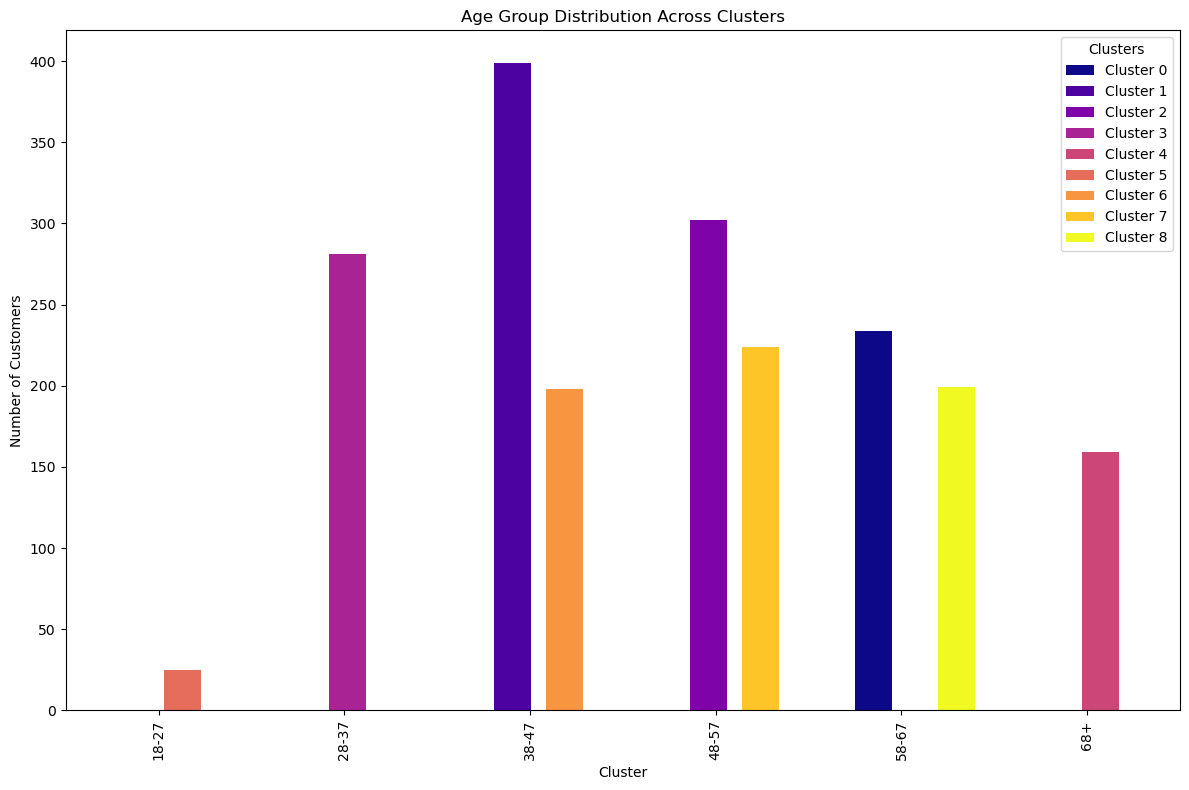

In [74]:
# Create a DataFrame for age group counts per cluster
cluster_age_distribution = pd.crosstab(df_scaled['Age_Group'], df_scaled['Cluster_age'])

print(cluster_age_distribution)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Grouped bar plot
bar = cluster_age_distribution.plot(kind='bar', ax=ax, colormap='plasma')

# Adjust bar width
for bar in ax.patches:
    bar.set_width(0.2)  # Set the width of the bars

# Modify legend labels
new_labels = [f'Cluster {i}' for i in cluster_age_distribution.columns]
ax.legend(new_labels, title='Clusters')

#  titles and labels
ax.set_title('Age Group Distribution Across Clusters')
ax.set_xlabel('Cluster')
ax.set_ylabel('Number of Customers')

# layout 
plt.tight_layout()

plt.show()


## Observations: Age Groups Distribution Across Clusters

- **Appearing in Two Clusters:**
  - Age groups 38-47, 48-57, and 58-67 each appear in two clusters.

- **Appearing in One Cluster:**
  - **18-27:** Belongs to Cluster 5 with 25 customers.
  - **28-37:** Belongs to Cluster 3 with 281 customers.
  - **68+:** Belongs to Cluster 4 with 159 customers.

- **Distribution Across Two Clusters:**
  - **38-47:** Appears in Clusters 1 (399 customers) and 6 (198 customers).
  - **48-57:** Appears in Clusters 2 (302 customers) and 7 (224 customers).
  - **58-67:** Appears in Clusters 0 (234 customers) and 8 (199 customers).

## Income and Amount spent by Age Groups

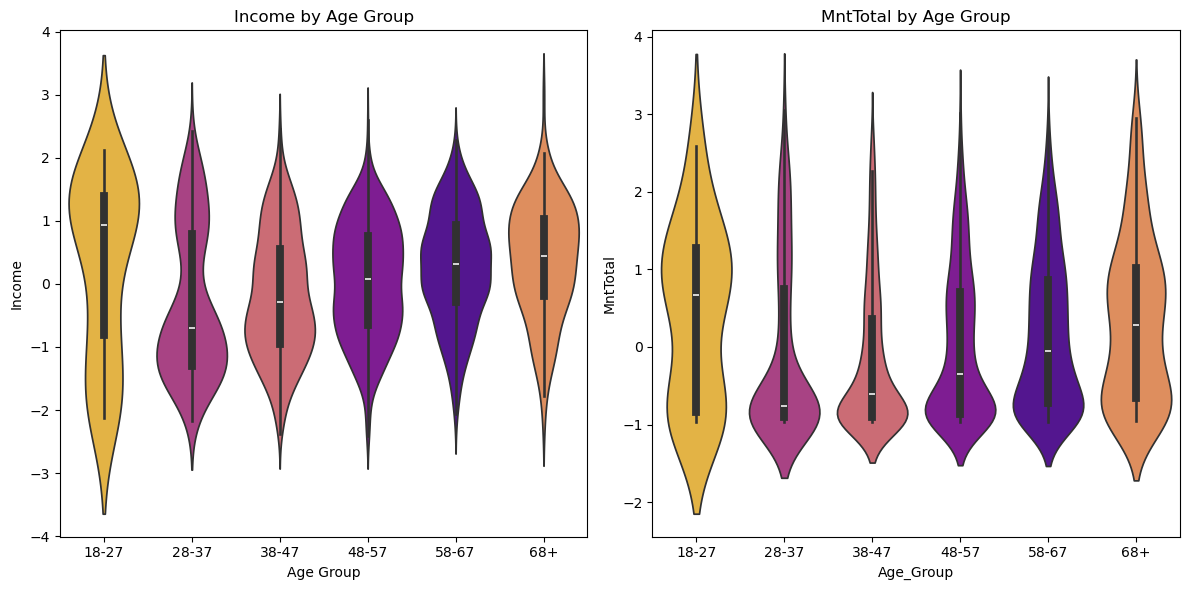

In [75]:
## Income and mntotal by age group
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

age_group_order = ['18-27', '28-37', '38-47', '48-57', '58-67', '68+']

# First subplot for Income
sns.violinplot(x='Age_Group', y='Income', hue='Age_Group', data=df_scaled, palette='plasma', order = age_group_order, ax= axes[0])
axes[0].set_title('Income by Age Group')
axes[0].set_xlabel('Age Group')

# Second subplot for MntTotal
sns.violinplot(x='Age_Group', y= 'MntTotal', hue='Age_Group', data=df_scaled, palette='plasma', order = age_group_order, ax= axes[1])
axes[1].set_title('MntTotal by Age Group')
axes[0].set_xlabel('Age Group')


# layout
plt.tight_layout()

plt.show()

## Observations: Income and Amount spent by Age Group

### **1. Income by Age Group (Left Plot):**
   - **18-27 Age Group:**
     - This group shows a wide distribution of income, with some individuals earning significantly higher or lower than the mean.
     - The distribution suggests a mix of students, early-career professionals, or young entrepreneurs, leading to a broader range of income levels.
   - **28-37, 38-47, 48-57, and 58-67 Age Groups:**
     - These age groups have relatively similar income distributions with a tighter spread around the mean. This suggests more stable income levels, likely due to established careers.
     - The **38-47** and **48-57** groups have slightly higher median incomes compared to the other age groups.
   - **68+ Age Group:**
     - This age group shows a broader distribution, with some individuals having lower incomes and a few having higher incomes. This may reflect the retirement phase, where income sources can vary widely.

### **2. MntTotal by Age Group (Right Plot):**
   - **18-27 Age Group:**
     - This group has a wide distribution of spending, similar to their income distribution. Some individuals in this group spend significantly more or less than the mean, likely influenced by lifestyle choices or disposable income availability.
   - **28-37, 38-47, 48-57, and 58-67 Age Groups:**
     - These age groups show more stable spending patterns, with distributions centered around the mean. This reflects consistent spending behaviors, possibly due to family responsibilities, mortgages, or other financial commitments.
   - **68+ Age Group:**
     - The spending distribution in this group is broader, indicating varied spending habits. Some individuals may be conservative with spending, while others might spend more on healthcare, travel, or leisuraviors of each age group.

## Income and Amount spent by Cluster

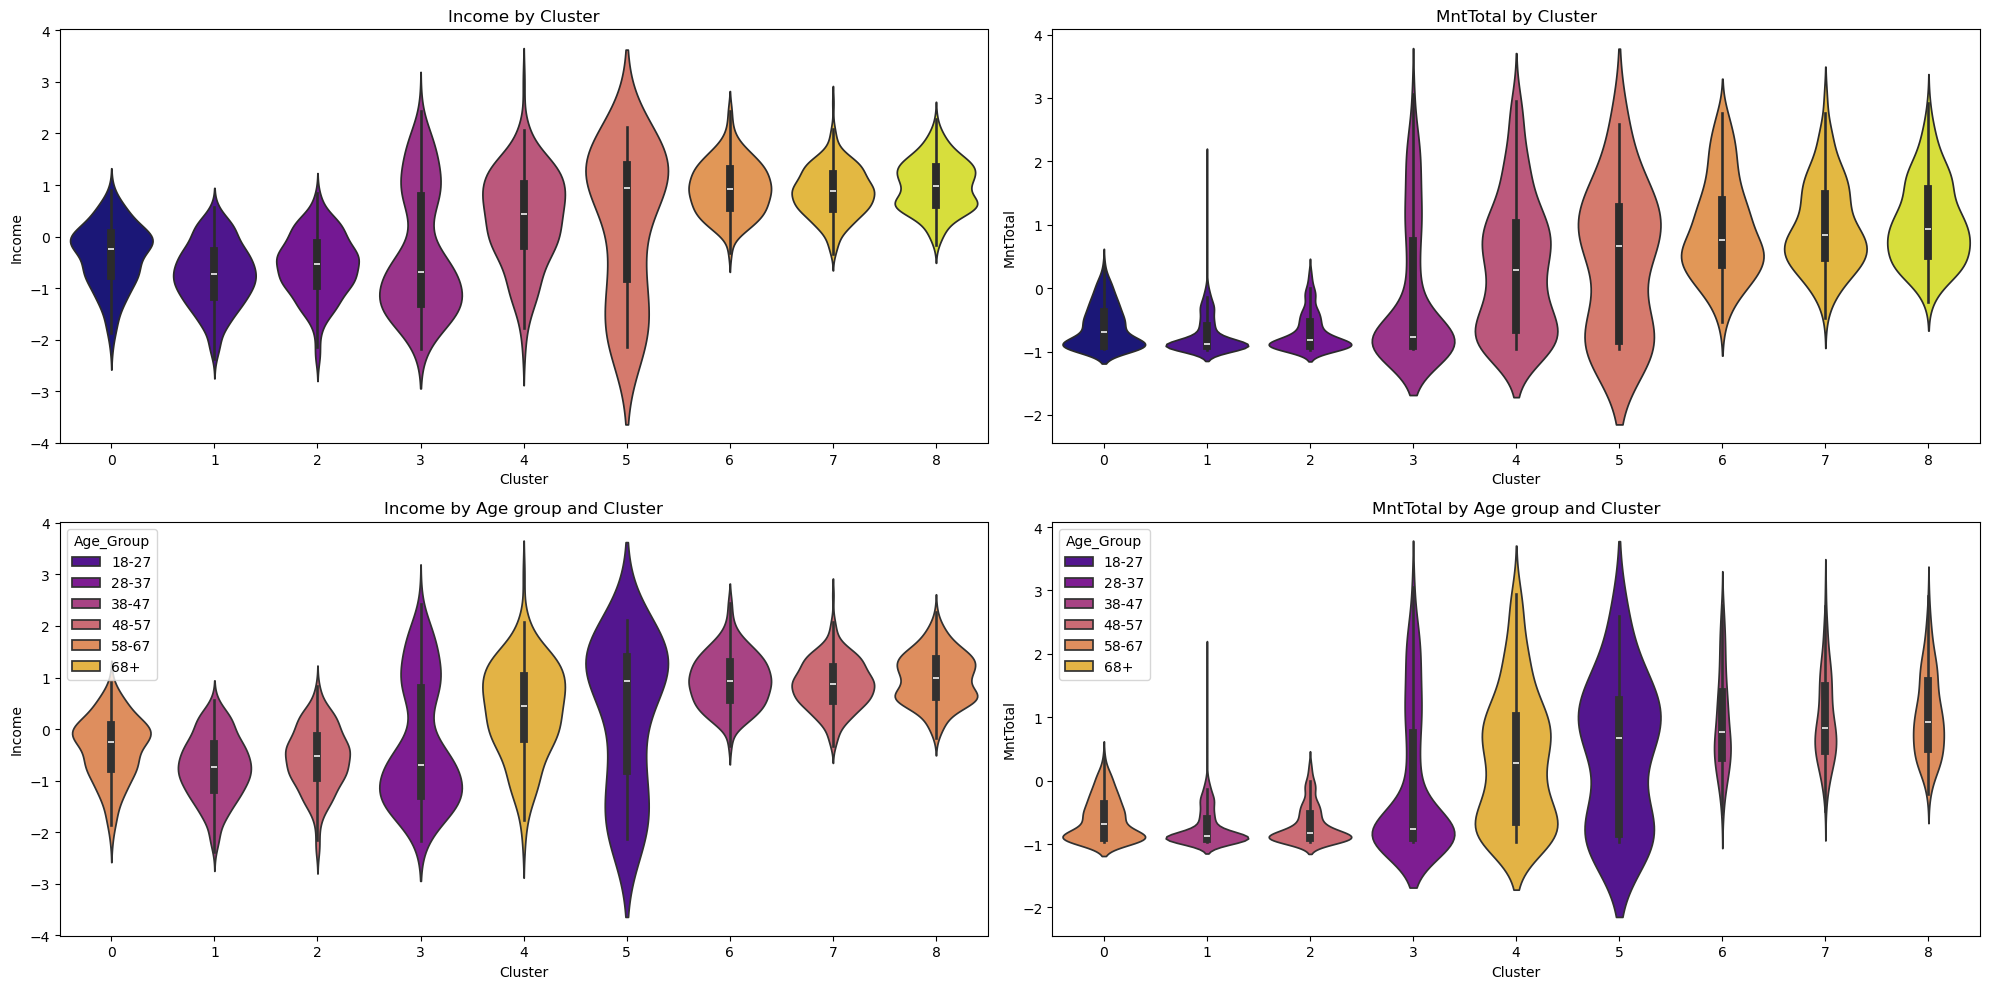

In [76]:
# age, income, mntotal


# cluster and income , cluster and mnttotal
fig, axes = plt.subplots(2, 2, figsize=(20,10))

# First subplot for Income
sns.violinplot(x=df_scaled['Cluster_age'], y=df_scaled['Income'], hue=df_scaled['Cluster_age'],  palette='plasma', ax=axes[0,0])
axes[0,0].set_title('Income by Cluster')
axes[0,0].set_xlabel('Cluster')

# Second subplot for MntTotal
sns.violinplot(x=df_scaled['Cluster_age'], y=df_scaled['MntTotal'] , hue=df_scaled['Cluster_age'], palette='plasma', ax=axes[0,1])
axes[0,1].set_title('MntTotal by Cluster')
axes[0,1].set_xlabel('Cluster')

sns.violinplot(x=df_scaled['Cluster_age'], y=df_scaled['Income'], hue=df_scaled['Age_Group'], hue_order=age_group_order, palette='plasma', ax=axes[1,0])
axes[1,0].set_title('Income by Age group and Cluster')
axes[1,0].set_xlabel('Cluster')

# Second subplot for MntTotal
sns.violinplot(x=df_scaled['Cluster_age'], y=df_scaled['MntTotal'] , hue=df_scaled['Age_Group'], hue_order=age_group_order, palette='plasma', ax=axes[1,1])
axes[1,1].set_title('MntTotal by Age group and Cluster')
axes[1,1].set_xlabel('Cluster')

axes[0,0].legend_.remove() 
axes[0,1].legend_.remove() 

plt.tight_layout()


plt.show()

## **Comprehensive Analysis and Insights**

After combining all the observations across different dimensions—age groups, clusters, income, and spending patterns—a detailed understanding of customer behavior can be drawn. Here are the key insights:

#### **1. Age Group Distribution and Their Influence Across Clusters:**
- **Age Group Dominance:**
  - The most significant age groups are **38-47** and **48-57**, reflecting mid-career professionals who likely have established financial stability. These groups are spread across multiple clusters, indicating diverse financial behaviors within these age ranges.
  - The least represented age group is **18-27**, suggesting that younger individuals, likely students or early-career professionals, have less influence on overall market trends.

- **Cluster Representation by Age Group:**
  - **One Cluster Representation:**
    - **18-27 (Cluster 5, 25 customers):** This group is isolated in a small cluster, indicating niche or specific spending behaviors. They are likely price-sensitive, with wide variations in income and spending.
    - **28-37 (Cluster 3, 281 customers):** This group is concentrated in a single cluster, suggesting more uniform financial behavior as they likely transition into stable careers and family life.
    - **68+ (Cluster 4, 159 customers):** The senior group shows a stable financial pattern, probably due to retirement, with spending focused on health, leisure, and essentials.
  - **Two Cluster Representation:**
    - **38-47 and 48-57:** Both age groups appear in two clusters, reflecting varied financial responsibilities and income levels. These groups represent a significant portion of the market, with one cluster typically showing higher income and spending than the other.
    - **58-67:** Similarly, this pre-retirement group is split into two clusters, indicating differences in retirement planning and disposable income.

#### **2. Cluster-Specific Insights:**
- **High Customer Count Clusters:**
  - **Cluster 1 (399 customers):** Dominated by the 38-47 age group, this cluster likely represents high-income, high-spending individuals. They are crucial for businesses targeting luxury goods and premium services.
  - **Cluster 2 (302 customers):** The 48-57 age group is prominent here, reflecting stable, high-income individuals likely to invest in long-term financial products and retirement planning.
  - **Cluster 3 (281 customers):** Dominated by the 28-37 age group, this cluster represents emerging professionals with growing spending power. Products and services focused on career development, family planning, and first-time investments would be effective here.

- **Low Customer Count Clusters:**
  - **Cluster 5 (25 customers):** Representing the 18-27 age group, this small cluster suggests niche marketing strategies, such as budget-friendly offerings and entry-level financial products.
  - **Cluster 6 and 7:** Although these clusters have fewer customers compared to the larger ones, they still play an important role, especially with the presence of mid-career individuals who may have moderate but stable income levels.

#### **3. Income and Spending Patterns:**
- **High Income and High Spending Clusters (Clusters 4, 5, 7, 8):**
  - These clusters represent affluent customers, predominantly middle-aged (28-57). They not only earn more but also spend significantly, making them ideal targets for premium products, luxury goods, and high-end services.
  - **Cluster 8** stands out with a diverse range of income and spending, indicating a mixed customer base that could be segmented further for tailored marketing.

- **Low Income and Low Spending Clusters (Clusters 0, 1, 2, 3):**
  - These clusters are dominated by younger or less affluent individuals, showing lower income and spending levels. Marketing strategies for these groups should focus on value for money, discounts, and budget-conscious products.
  - **Cluster 1** also shows a broad income distribution, suggesting the presence of both high and low-income individuals, which might require a segmented approach.

#### **4. Overall Market Insights:**
- **High-Impact Age Groups:**
  - The **38-57 age range** is the most influential, with high income and spending potential. Businesses should focus on this group with diversified products that cater to their varying financial situations.
  - **18-27 and 68+ age groups** are niche markets with specific needs. For younger individuals, entry-level products and educational financial tools are key, while for seniors, healthcare, retirement planning, and leisure-focused products should be emphasized.

- **Strategic Market Segmentation:**
  - **Affluent Segments:** Clusters with high-income individuals should be targeted with premium offerings, personalized services, and exclusive products.
  - **Price-Sensitive Segments:** Clusters with lower income and spending require strategies that emphasize value, affordability, and practical benefits.

### **Conclusion:**
The comprehensive analysis reveals that while certain age groups and clusters dominate the market with high income and spending power, there are also niche segments with unique needs. Businesses can leverage these insights to design targeted marketing strategies, product offerings, and services that resonate with each specific demographic. Understanding the distribution of income and spending within these clusters will allow for more personalized and effective customer engagement, ultimately driving better business outcomes.


## **Recommendations**


1. **Target Premium Offerings:**
   - Focus on marketing premium products and exclusive services to high-income clusters (4, 5, 7, and 8), particularly for the 38-57 age group. Personalized luxury experiences and exclusive deals can drive higher spending.

2. **Value-Driven Products:**
   - Develop and promote affordable product lines for clusters 0, 1, 2, and 3, emphasizing discounts and bundle offers. These segments, which include younger and lower-income customers, are more price-sensitive.

3. **Age-Specific Marketing:**
   - Tailor marketing strategies based on age group needs—promote entry-level and lifestyle products to younger clusters (18-27) and retirement or healthcare services to the 68+ age group.

4. **Loyalty Programs for Retention:**
   - Introduce loyalty programs for middle-aged professionals in clusters 1 and 2, offering rewards and personalized recommendations to boost customer retention and repea
t purchases.